In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob

import warnings
warnings.filterwarning.("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [3]:
consumer_key="vLPDq6d3VcpIDZsKByloFUdWQ"
consumer_scret="R6fYDY6llVIZhJ2CO9yuvdBAllCi8brni1zktePxwNErDLsS8O"
access_token="1377948754658009093-eVkn0pcjLhQKYcnBQAHF0G7bpFgBtY"
access_token_scret="xq7AjYpag5pYddaAtT6P2osHvCQjTgGsfCKR5YnV28S6x"

In [4]:
auth=tw.OAuthHandler(consumer_key,consumer_scret)
auth.set_access_token(access_token,access_token_scret)
api=tw.API(auth,wait_on_rate_limit=True)

In [5]:
search_words="climate"+"change"
date_since="2020-11-01"

In [6]:
tweets=tw.Cursor(api.search,q=search_words,lang="en",since=date_since).items(1000)

In [47]:
new_search_words=search_words+"-filter:retweets"
date_since="2020-11-01"
tweets=tw.Cursor(api.search,q=new_search_words,lang="en",since=date_since).items(1000)
all_tweets = [tweet.text for tweet in tweets]
all_tweets[:5]

['Pelican Gliding, perfect #wallart for your #home or #office \n\nhttps://t.co/xoih3eCKlb\n\n#ClimateCrisis… https://t.co/SP0ZTW3iBf',
 '“We know about ‘greenwash’ – when polluters falsely present themselves as environmentally responsible. This is ‘spo… https://t.co/J9aZeHar6h',
 '@SARA2001NOOR Endorsing their racist population?\nEmpowering the wealthy?\n\nDenying #climatechange ?\n\nOh wait....I th… https://t.co/cqONV71AtY',
 'It’s time to grow a pair for the planet.  ⚽️🏀⚾️🎾🏐🏉🎱🌍💚 #GrowAPairForThePlanet #ChangeTheWorld #BeTheChange #litter… https://t.co/TktyBEanQ1',
 "It's OK if you don't fit into the status quo. The status quo is emptying our oceans and melting our ice caps. A gen… https://t.co/ltHppMMpvg"]

In [48]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", txt).split())
print("ututu")

ututu


In [49]:

all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]

all_tweets_no_urls[:5]

['Pelican Gliding perfect wallart for your home or office ClimateCrisis',
 'We know about greenwash when polluters falsely present themselves as environmentally responsible This is spo',
 'SARA2001NOOR Endorsing their racist population Empowering the wealthy Denying climatechange Oh wait I th',
 'It s time to grow a pair for the planet GrowAPairForThePlanet ChangeTheWorld BeTheChange litter',
 'It s OK if you don t fit into the status quo The status quo is emptying our oceans and melting our ice caps A gen']

In [50]:
# Create textblob objects of the tweets
all_tweets_no_urls[0]


'Pelican Gliding perfect wallart for your home or office ClimateCrisis'

In [53]:
# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tweet) for tweet in all_tweets_no_urls]

sentiment_objects[0].polarity, sentiment_objects[0]

(1.0,
 TextBlob("Pelican Gliding perfect wallart for your home or office ClimateCrisis"))

In [52]:
# Create list of polarity valuesx and tweet text
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_values[0]

[1.0, 'Pelican Gliding perfect wallart for your home or office ClimateCrisis']

In [54]:
# Create dataframe containing the polarity value and tweet text
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])
pd.read_csv()
sentiment_df.head()

,polarity,tweet
0,1.00,Pelican Gliding perfect wallart for your home ...
1,0.10,We know about greenwash when polluters falsely...
2,0.50,SARA2001NOOR Endorsing their racist population...
3,0.00,It s time to grow a pair for the planet GrowAP...
4,0.45,It s OK if you don t fit into the status quo T...


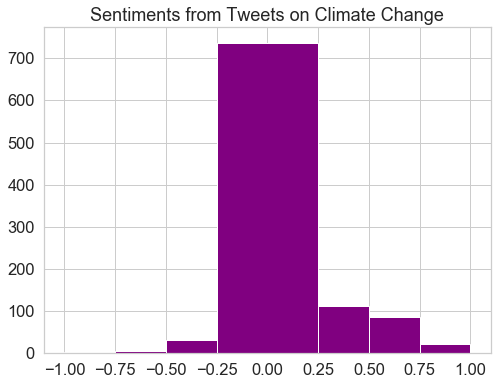

In [55]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Climate Change")
plt.show()

In [56]:
# Remove polarity values equal to zero
sentiment_df = sentiment_df[sentiment_df.polarity != 0]

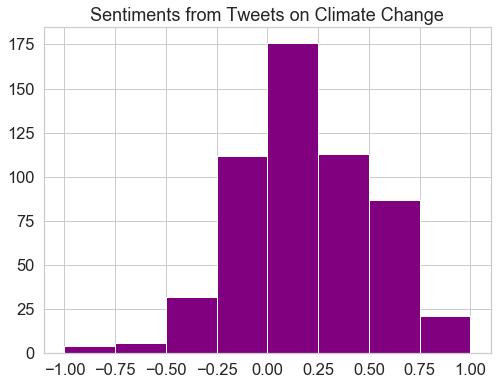

In [57]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Climate Change")
plt.show()

In [1]:
time.sleep()

NameError: name 'time' is not defined